# Training Neural Networks with Keras

This notebook is an intrdouction to training a neural network with the high level framework `Keras`. We will use a toy dataset that is about classifying pictures of fashion items.

Find out a bit about it from https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles and https://github.com/zalandoresearch/fashion-mnist

In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

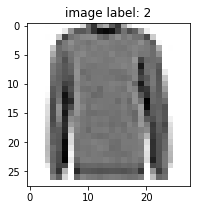

In [18]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index],
           cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % y_train[sample_index]);

## Preprocessing

Normalise all features to be centered on zero with standard deviation 1.

In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
from sklearn import preprocessing

X_train = np.asarray(X_train, dtype='float32')
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
y_train = np.asarray(y_train, dtype='int32')

X_test = np.asarray(X_test, dtype='float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
y_test = np.asarray(y_test, dtype='int32')

# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
# use `scaler` to fit() and transform() both
# the training and testing data
# Store the transformed data in X_train
# and X_test again.
### BEGIN SOLUTION
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
### END SOLUTION

# print(scaler.mean_)
# print(scaler.scale_)

Let's display one of the transformed samples (after feature standardization):

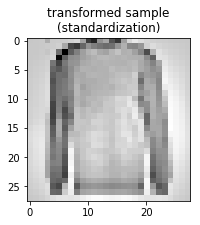

In [21]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(28, 28),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)");

The scaler objects makes it possible to recover the original sample:

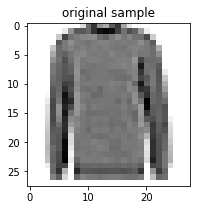

In [22]:
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index]).reshape(28, 28),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("original sample");

In [23]:
# Double check we understand the shape of the data
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [24]:
print(X_test.shape, y_test.shape)

(10000, 784) (10000,)


## First Feed Forward NN with Keras

Objectives of this section:

- Build and train your first feedforward network using `Keras`
    - https://keras.io/getting-started/functional-api-guide/
- Experiment with different optimizers, activations, size of layers, initialisations

### The Keras Workflow

To build a first neural network we need to turn the target variable into a vector "one-hot-encoding" representation. Here are the labels of the first samples in the training set encoded as integers:

In [25]:
y_train[:3]

array([9, 0, 0], dtype=int32)

Keras provides a utility function to convert integer-encoded categorical variables as one-hot encoded values:

In [26]:
import keras
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

We can now build and train our first feed forward neural network using the high level API from keras:

- first we define the model by stacking operators with the correct dimensions
- then we define a loss function and plug in the SGD optimizer
- then we feed the model the training data for a fixed number of epochs

In [27]:
from keras.layers.core import Activation
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers

n_input = X_train.shape[1]
n_hidden = 100
n_classes = 10

inputs = Input(shape=(n_input,))

h = Dense(n_hidden)(inputs)
h = Activation('tanh')(h)

y = Dense(n_classes)(h)
y = Activation('softmax')(y)

model = Model(inputs, y)

model.compile(optimizer=optimizers.SGD(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=15, batch_size=32);

Epoch 1/15
60000/60000 [==============================] - 4s 67us/step - loss: 0.5493 - acc: 0.8108
Epoch 2/15
60000/60000 [==============================] - 4s 60us/step - loss: 0.4098 - acc: 0.8566
Epoch 3/15
60000/60000 [==============================] - 4s 59us/step - loss: 0.3745 - acc: 0.8687
Epoch 4/15
60000/60000 [==============================] - 4s 60us/step - loss: 0.3523 - acc: 0.8756
Epoch 5/15
60000/60000 [==============================] - 4s 62us/step - loss: 0.3350 - acc: 0.8826
Epoch 6/15
60000/60000 [==============================] - 4s 62us/step - loss: 0.3211 - acc: 0.8871
Epoch 7/15
60000/60000 [==============================] - 4s 61us/step - loss: 0.3086 - acc: 0.8914
Epoch 8/15
60000/60000 [==============================] - 4s 60us/step - loss: 0.2986 - acc: 0.8951
Epoch 9/15
60000/60000 [==============================] - 4s 60us/step - loss: 0.2891 - acc: 0.8977
Epoch 10/15
60000/60000 [==============================] - 4s 60us/step - loss: 0.2804 - acc: 0.9019

### Exercises: Impact of the Optimizer

- Try to decrease the learning rate value by a factor of 10 or 100. What do you observe?
- Try to increase the learning rate value to make the optimization diverge.
- (Bonus: Configure the SGD optimizer to enable a Nesterov momentum of 0.9)
  
Note that the keras API documentation is available at:

https://keras.io/

It is also possible to learn more about the parameters of a class by using the question mark: type and evaluate:

```python
optimizers.SGD?
```

in a jupyter notebook cell.

In [12]:
### BEGIN SOLUTION

# Analysis:
#
# Setting the learning rate value to a small value (e.g. lr=0.001 on
# this dataset) makes the model train much slower (it has not
# converged yet after 15 epochs).
#
# Using momentum tends to mitigate the small learning rate / slow
# training problem a bit.
#
# Setting the learning rate to a very large value (e.g. lr=10)
# makes the model bounce around randomly. Circling around a good local
# minimum and therefore prevents it from reaching a low training loss even
# after 30 epochs

optimizer = optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=15, batch_size=32)

### END SOLUTION

Epoch 1/15
60000/60000 [==============================] - 4s 62us/step - loss: 0.7327 - acc: 0.7657
Epoch 2/15
60000/60000 [==============================] - 4s 61us/step - loss: 0.6967 - acc: 0.7849
Epoch 3/15
60000/60000 [==============================] - 4s 62us/step - loss: 0.6684 - acc: 0.7922
Epoch 4/15
60000/60000 [==============================] - 4s 65us/step - loss: 0.6381 - acc: 0.8022
Epoch 5/15
60000/60000 [==============================] - 4s 61us/step - loss: 0.6299 - acc: 0.8053
Epoch 6/15
60000/60000 [==============================] - 4s 62us/step - loss: 0.6188 - acc: 0.8105
Epoch 7/15
60000/60000 [==============================] - 4s 62us/step - loss: 0.6137 - acc: 0.8088
Epoch 8/15
60000/60000 [==============================] - 4s 62us/step - loss: 0.6067 - acc: 0.8138
Epoch 9/15
60000/60000 [==============================] - 4s 62us/step - loss: 0.6092 - acc: 0.8144
Epoch 10/15
60000/60000 [==============================] - 4s 61us/step - loss: 0.5998 - acc: 0.8162

- Replace the SGD optimizer by the Adam optimizer from keras and run it
  with the default parameters.

- Add another hidden layer and use the "Rectified Linear Unit" for all
  hidden layers. Can you still train the model with Adam with its default global
  learning rate?

- Bonus: try the Adadelta optimizer (no learning rate to set).

Hint: use `optimizers.<TAB>` to tab-complete the list of implemented optimizers in Keras.

In [13]:
### BEGIN SOLUTION

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=15, batch_size=32)

### END SOLUTION

Epoch 1/15
60000/60000 [==============================] - 4s 74us/step - loss: 0.4178 - acc: 0.8585
Epoch 2/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.3630 - acc: 0.8717
Epoch 3/15
60000/60000 [==============================] - 4s 70us/step - loss: 0.3429 - acc: 0.8767
Epoch 4/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.3257 - acc: 0.8831
Epoch 5/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.3160 - acc: 0.8864
Epoch 6/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.3059 - acc: 0.8897
Epoch 7/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.2983 - acc: 0.8917
Epoch 8/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.2921 - acc: 0.8950
Epoch 9/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.2836 - acc: 0.8985
Epoch 10/15
60000/60000 [==============================] - 4s 70us/step - loss: 0.2786 - acc: 0.8998

In [14]:
### BEGIN SOLUTION

inputs = Input(shape=(n_input,))

h = Dense(n_hidden)(inputs)
h = Activation('relu')(h)

h = Dense(n_hidden)(h)
h = Activation('relu')(h)

y = Dense(n_classes)(h)
y = Activation('softmax')(y)

relu_model = Model(inputs, y)

relu_model.compile(optimizer="adam",
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=15, batch_size=32)

### END SOLUTION

Epoch 1/15
60000/60000 [==============================] - 4s 73us/step - loss: 0.2413 - acc: 0.9140
Epoch 2/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.2355 - acc: 0.9156
Epoch 3/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.2332 - acc: 0.9172
Epoch 4/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.2274 - acc: 0.9182
Epoch 5/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.2223 - acc: 0.9207
Epoch 6/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.2184 - acc: 0.9219
Epoch 7/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.2146 - acc: 0.9227
Epoch 8/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.2104 - acc: 0.9256
Epoch 9/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.2078 - acc: 0.9264
Epoch 10/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.2022 - acc: 0.9289

In [15]:
### BEGIN SOLUTION

# Analysis:
#
# Adam with its default global learning rate of 0.001 tends to work
# in many settings and often converges as fast or faster than SGD
# with a well tuned learning rate.
#
# Adadelta has no learning rate setting at all!
#
# References:
#
# Adadelta: https://arxiv.org/abs/1212.5701
# Adam:     https://arxiv.org/abs/1412.6980

### END SOLUTION

### Exercises: forward pass and generalization

Pick any or all of the different models you built above, and:

- Compute predictions on the test set using `model.predict(...)`
  - what do you get back from `predict()`? How do you conver it back to human readable labels?
- Compute the average accuracy of the model on the test set

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 3s 68us/step - loss: 0.5808 - acc: 0.8012 - val_loss: 0.4567 - val_acc: 0.8357
Epoch 2/15
48000/48000 [==============================] - 4s 73us/step - loss: 0.4288 - acc: 0.8499 - val_loss: 0.4150 - val_acc: 0.8540
Epoch 3/15
48000/48000 [==============================] - 4s 80us/step - loss: 0.3907 - acc: 0.8623 - val_loss: 0.3952 - val_acc: 0.8602
Epoch 4/15
48000/48000 [==============================] - 4s 74us/step - loss: 0.3664 - acc: 0.8719 - val_loss: 0.3809 - val_acc: 0.8642
Epoch 5/15
48000/48000 [==============================] - 3s 66us/step - loss: 0.3487 - acc: 0.8773 - val_loss: 0.3703 - val_acc: 0.8730
Epoch 6/15
48000/48000 [==============================] - 3s 64us/step - loss: 0.3336 - acc: 0.8835 - val_loss: 0.3624 - val_acc: 0.8717
Epoch 7/15
48000/48000 [==============================] - 3s 64us/step - loss: 0.3210 - acc: 0.8871 - val_loss: 0.3573 - val_acc

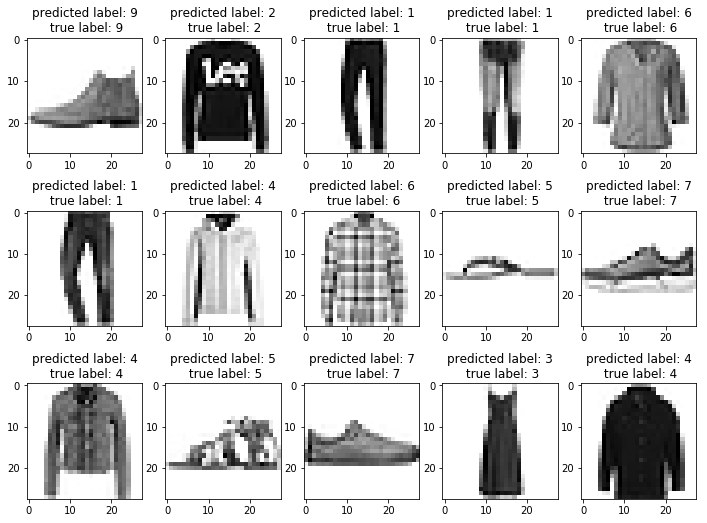

In [16]:
### BEGIN SOLUTION

inputs = Input(shape=(n_input,))

h = Dense(n_hidden)(inputs)
h = Activation('tanh')(h)

y = Dense(n_classes)(h)
y = Activation('softmax')(y)

model = Model(inputs, y)

model.compile(optimizer=optimizers.SGD(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=15, batch_size=32, validation_split=0.2)

# Compute predictions and convert into class labels
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)


# Display the first few images, the predicted labels and the true labels
plt.figure(figsize=(12, 9))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(scaler.inverse_transform(X_test[i]).reshape(28, 28),
               cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("predicted label: %d\n true label: %d"
              % (y_pred[i], y_test[i]))

print("test acc: %0.4f" % np.mean(np.equal(y_pred, y_test)))

### END SOLUTION